# Prepare

In [13]:
# full code

#-*-coding:euc-kr

"""
Peter's Code
Clone Code w/ 6개월 치 업무를 하루만에 끝내는 업무 자동화
Last Modification : 2021.11.24
"""

# import
import time
import random
import os
import shutil

#
print("Process Start.")
start_time = time.time()

# iterations
NUM_SAMPLES = 1000

# def
alphabet_samples = "abcdefghizklmnopqrstuvwxyz1234567890"

def random_string(length):
    result = ""
    for i in range(length):
        result += random.choice(alphabet_samples)
    return result

# def
first_name_samples = "김이박최정강조윤장임"
middle_name_samples = "민서예지도하주윤채현지"
last_name_samples = "준윤우원호후서연아은진"

def random_name():
    result = ""
    result += random.choice(first_name_samples)
    result += random.choice(middle_name_samples)
    result += random.choice(last_name_samples)
    return result

# os
if os.path.exists("personal_info"):
    shutil.rmtree("personal_info")
os.mkdir("personal_info")

# creating files
for i in range(NUM_SAMPLES):
    name = random_name()

    filename = "personal_info/" + str(i) + "_" + name + ".txt"
    
    outfile = open(filename, 'w')

    outfile.write("name : " + name + "\n")
    outfile.write("age : " + str(time.time())[-2:] + "\n")
    outfile.write("e-mail : " + random_string(8) + "@bhban.com" + "\n") # outfile = write("e-mail :" + random_string(8) + "@bhban.com\n")
    outfile.write("division :" + random_string(3) + "\n")
    outfile.write("telephone : 010-" + str(time.time())[-4:] + str(time.time())[-6:-2] + "\n")
    outfile.write("sex : " + random.choice(["male", "female"]))

    outfile.close()

#
print("Process Done.")
end_time = time.time()
print("Peter's code: " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
Peter's code: 0.08025312423706055 seconds.


# Notice
- merged_ID.xlsx 의 용량이 6절에 비해 4KB (50->46KB) 감소하였음
- 숫자를 글자 형태로 저장하면, 결과물의 용량을 줄일 수 있다.
- 엑셀에서 숫자의 좌측 상단에 붙은 삼각형을 통해 알 수 있다.

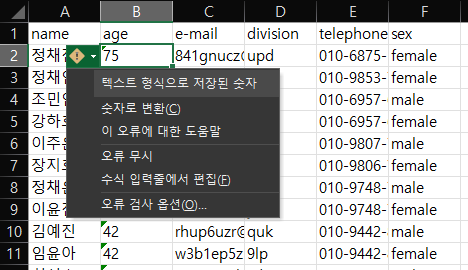

# RPA code design
- 목표 정하기
  1. 개인정보 파일 1000개 불러오기
  1. 하나로 합치기
  1. 데이터를 CSV 파일로 저장했다가 변환하는 것이 아니라 컴퓨터의 메모리상에 저장하고 한번에 엑셀 파일로 저장하기
- 목표를 달성하는 데 필요한 작업
  1. 파일을 편하고 예쁘게 가공하기 위한 방법 검색

#### ※ Pyexcel: 배열(array)을 한번에 엑셀 파일로 변환하기 ※
- [pyexcel docs](http://docs.pyexcel.org/en/latest/)

In [8]:
! pip install pyexcel pyexcel-xlsx

     |████████████████████████████████| 242 kB 5.6 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [3]:
import pyexcel as px

my_array = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]
px.save_as(array=my_array, dest_file_name="test.csv")

In [11]:
import pyexcel_xlsx

px.save_as(array=my_array, dest_file_name="test.xlsx")

- [pyexcel > Available Plugins](https://pypi.org/project/pyexcel/0.5.7/)

In [15]:
# full code

#-*-coding:euc-kr

"""
Peter's Code
Clone Code w/ 6개월 치 업무를 하루만에 끝내는 업무 자동화
Last Modification : 2021.11.24
"""

# import
import time
import os
import pyexcel as px
import sys

#
print("Process Start.")
start_time = time.time()


"""
# original
directory = sys.argv[1]
"""

# revised
directory = "personal_info"

outfile_name = "merged_ID.xlsx"

input_files = os.listdir(directory)

#
CONTENTS = []
HEADERS = []

contents_has_header = False

#
for filename in input_files:
    # exception
    if ".txt" not in filename:
        continue

    #
    file = open(directory + "/" + filename)

    contents = []

    for line in file:
        # exception
        if " : " not in line:
            continue

        header, content = line.strip().split(" : ")

        #
        if not contents_has_header:
            HEADERS.append(header)

        contents.append(content)

    #
    if not contents_has_header:
        CONTENTS.append(HEADERS)
        contents_has_header = True
    
    CONTENTS.append(contents)

    #
    file.close()

# plugins
px.save_as(array=CONTENTS, dest_file_name=outfile_name)

#
print("Process Done.")
end_time = time.time()
print("Peter's code: " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
Peter's code: 0.13692855834960938 seconds.


## Summary
- 출력 파일을 'w' 모드로 open 하는 것이 아닌 리스트로 만드는 부분으로 수정
- ```CONTENT.append(content)``` 로 리스트에 (개별 파일 내용) 리스트를 삽입하는 것으로 대체
- 배열을 엑셀파일로 출력하여 작업 소요 시간을 획기적으로 줄임